### Derivative using Neville Scheme

Using the Neville scheme to find the derivative of a function. 

The given function is: $$f(x) = tan(x)$$

In [3]:
## Neville Scheme function

def Nev(x, y, x_int):
    n = len(x)
    N = np.zeros((n,n))

    for i in range(n):
        N[i, 0] = y[i]

    for i in range(1, n):
        for j in range(n-i):
            N[j][i] = (((x_int - x[j+i])*N[j, i-1]) + ((x[j] - x_int)*N[j+1, i-1])) / (x[j] - x[j+i])
    return(N)
                                                     

    

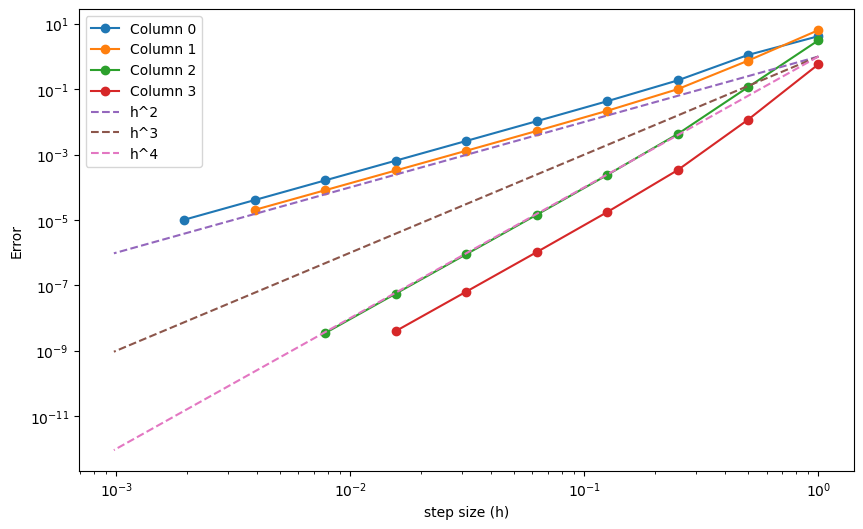

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

## stuff
n_max = 10
x_int = 0

## All Functions

def f(x):
    return(math.tan(x))

def fd(x):
    return(1/(math.cos(x)**2))

def D(h):
    x0 = math.pi / 4
    c = (f(x0 + h) - f(x0 - h))/(2*h)
    return(c)

def H(i):
    return(2**(-i))



## h values
h = []
for i in range(n_max+1):
    h.append(H(i))

# D value list
d_val = []
for i in h:
    d_val.append(D(i))


#Interpolated matrix

neville = Nev(h, d_val, x_int)

#Actual Derivate

actual = fd(math.pi/4)

error = abs(actual - neville)

#print(error)


## Plots

plt.figure(figsize=(10, 6))
for m in range(4):
    errors = error[:n_max-m, m]
    plt.loglog(h[:n_max-m], errors, label = f'Column {m}', marker = 'o')

h_range = np.array(h)
plt.loglog(h_range, h_range**2, '--', label = 'h^2')
plt.loglog(h_range, h_range**3, '--', label = 'h^3')
plt.loglog(h_range, h_range**4, '--', label = 'h^4')  

plt.xlabel('step size (h)')
plt.ylabel('Error')
plt.legend()
plt.show()

Observation: When the step sizes increase, the Neville error converges faster to zero.

### Chebyshev vs Taylor interpolation 

For a given function $$f(x) = \frac{ 1 }{ 4−x^2 }$$, the chebyshev nodes are taken and an interpolating polynomial is created using the Neville scheme. The error between the Chebyshev interpolating polynomial and the Taylor polynomial is then compared to see which is close to the exact function.

In [8]:

import math

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

from sympy.parsing.sympy_parser import parse_expr

In [9]:
def Neville(x, y, x_int):
    n = len(x)
    N = np.zeros((n,n))

    for i in range(n):
        N[i, 0] = y[i]

    for i in range(1, n):
        for j in range(n-i):
            N[j, i] = (((x_int - x[j+i])*N[j, i-1]) + ((x[j] - x_int)*N[j+1, i-1])) / (x[j] - x[j+i])
    return(N[0, -1])

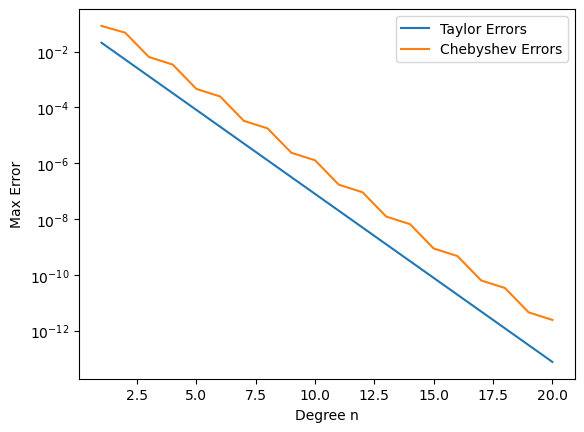

In [10]:
def main_func(x):
    return(1 / (4 - x**2))


# Creating the Chebyshev nodes and interpolating polynomial
def cheb_nodes(n):
    xc = []
    fc = []
    for k in range(n):
        xc.append(math.cos((((2*k) +1)*math.pi)/ (2*(n))))
        fc.append(main_func(xc[k]))
    return(xc, fc)

def cheb_nev_interpolant(n):
    xc, fc = cheb_nodes(n)

    def cheb_lam(x):
        return(Neville(xc, fc, x))

    return(cheb_lam)


x = sym.Symbol('x')


# Creating the Taylor polynomial
def polytaylor(fx, x0, n):
    x = sym.Symbol('x')
    n = 2*n
    polynomial = 0

    for k in range(n+1):
        dif = fx.diff(x,k)
        difx0 = dif.subs(x,x0)
        divisor = sym.factorial(k)
        termk = (difx0 / divisor) * (x-x0) ** k
        polynomial = polynomial + termk
    return (polynomial)


# Taking errors
def max_error(ft, fa, x_val):
    error = []
    for i in x_val:
        error.append(abs(ft(i) - fa(i)))
    return(max(error))


x_val = np.linspace(-1, 1, 100)

f_lam = sym.lambdify(x, main_func(x))

tay_errors = []
cheb_errors = []

n = 10

nl = []
for i in range(1, (2*n)+1):
    nl.append(i)
    
for i in range(1, (2*n) +1):
    ## Taylor of degree 2n
    f_main = 1/(4 - x**2)

    tay_poly = polytaylor(f_main, 0, i)
    tay_lam = sym.lambdify(x, tay_poly)

    ## chebyshev

    cheb_lam = cheb_nev_interpolant(i)
    tay_errors.append(max_error(f_lam, tay_lam, x_val))
    cheb_errors.append(max_error(f_lam, cheb_lam, x_val))


plt.figure()
plt.semilogy(nl, tay_errors, label = "Taylor Errors")
plt.semilogy(nl, cheb_errors, label = "Chebyshev Errors")
plt.xlabel("Degree n")
plt.ylabel("Max Error")
plt.legend()
plt.show()


The Chebyshev polynomial has much lesser error than Taylor polynomial and it converges to machine precision when the size increases.

### Drawing a cubic spline

Data: (0, 0), (1, 1), (2, 1), (3, 2)

For the given data, the coefficients are taken based on the 4 cubic spline conditions and the data is split into three segments.

In [14]:
a = np.array([[1, 1, 1], [1, 3, 7], [1, 5, 19]])
b = np.array([1, 0, 1])

sol = np.linalg.solve(a, b)

a1 = 0
b1 = sol[0]
c1 = sol[1]
d1 = sol[2]
print("\n a1 = 0 \n b1 = ", sol[0], "\n", "c1 = ", sol[1], "\n", "d1 = ", sol[2])


 a1 = 0 
 b1 =  2.166666666666667 
 c1 =  -1.5 
 d1 =  0.3333333333333333


In [15]:
## 2
a2 = 1
b2 = b1 + (2*c1) + (3*d1)
c2 = ((2*c1)+(6*d1))/2
d2 = d1

print(a2, b2, c2, d2)

1 0.16666666666666696 -0.5 0.3333333333333333


In [16]:
## 3
a3 = 1
b3 = b2 + (2*c2) + (3*d2)
c3 = ((2*c2)+(6*d2))/2
d3 = d1
print(a3, b3, c3, d3)

1 0.16666666666666696 0.5 0.3333333333333333


In [17]:
a = np.array([[1, 1, 1], [1, 3, 7], [1, 5, 19]])
b = np.array([0, 1, 1])

print(np.linalg.solve(a, b))

[-0.83333333  1.         -0.16666667]


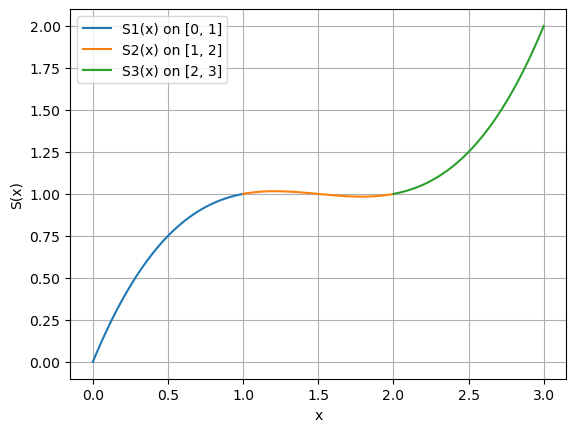

In [18]:
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(1, 2, 100)
x3 = np.linspace(2, 3, 100)


S1 = a1 + (b1 * (x1 - 0)) + (c1 * (x1-0)**2) + (d1 * (x1 - 0)**3)
S2 = a2 + (b2 * (x2 - 1)) + (c2 * (x2-1)**2) + (d2 * (x2 - 1)**3)
S3 = a3 + (b3 * (x3 - 2)) + (c3 * (x3-2)**2) + (d3 * (x3 - 2)**3)

plt.plot(x1, S1, label = 'S1(x) on [0, 1]')
plt.plot(x2, S2, label = 'S2(x) on [1, 2]')
plt.plot(x3, S3, label = 'S3(x) on [2, 3]')

plt.xlabel("x")
plt.ylabel("S(x)")
plt.legend()

plt.grid(True)